Load the Iris dataset into a Pandas DataFrame and display the first 5 rows.

Check for missing values in the dataset and print the count of nulls for each column.

Display only the sepal length and species columns.

Filter the dataset to include only rows where petal width > 1.5 and display the first 5 rows.

Compute the sum of petal lengths for all observations.

Create a new column called sepal_area = sepal length × sepal width.

Find the maximum petal length for the species 'setosa'.

Group the dataset by species and calculate:

> Maximum of sepal length

> Mean of sepal width

Define the independent variables (X) and dependent variable (y) to predict the species.

Split the dataset into 80% training and 20% testing sets.

Train and evaluate the following models:

Logistic Regression

K-Nearest Neighbors (KNN)

Support Vector Machine (SVM)

Decision Tree

Print the confusion matrix and accuracy score for all four models.

Compare the accuracy of all models using a bar graph

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
Data=sns.load_dataset('iris')
Data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Check for missing values in the dataset and print the count of nulls for each column.

In [9]:
Mis=Data.isnull().sum()
Mis

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Filter the dataset to include only rows where the species is 'setosa' and calculate the mean petal length for this subset.

In [11]:
setosa=Data[Data['species']=="setosa"]

Mean=setosa['petal_length'].mean()
Mean

np.float64(1.4620000000000002)

Filter the dataset to include only rows where petal width > 1.5 and display the first 5 rows.

In [12]:
db=Data[Data['petal_width']>1.5]
db.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,versicolor
70,5.9,3.2,4.8,1.8,versicolor
77,6.7,3.0,5.0,1.7,versicolor
83,6.0,2.7,5.1,1.6,versicolor
85,6.0,3.4,4.5,1.6,versicolor


Compute the sum of petal lengths for all observations

In [13]:
Data['petal_length'].sum()

np.float64(563.7)

Create a new column called sepal_area = sepal length × sepal width.

In [15]:
Data['sepal_area']=Data['sepal_length']*Data['sepal_width']
Data['sepal_area']

,sepal_area
0,17.85
1,14.70
2,15.04
3,14.26
4,18.00
...,...
145,20.10
146,15.75
147,19.50
148,21.08


Find the maximum petal length for the species 'setosa'

In [16]:
d1=Data[Data['species']=="setosa"]
d1['petal_length'].max()

1.9


Group the dataset by species and calculate:

> Maximum of sepal length

> Mean of sepal width

In [21]:
Data.groupby('species')['sepal_length'].max()
Data.groupby('species')['sepal_width'].mean()

,sepal_width
species,
setosa,3.428
versicolor,2.770
virginica,2.974


Define the independent variables (X) and dependent variable (y) to predict the species.

In [22]:
x=Data[['sepal_length','sepal_width','petal_length','petal_width']]
y=Data['species']
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

Split the dataset into 80% training and 20% testing sets.

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test

(    sepal_length  sepal_width  petal_length  petal_width
 25           5.0          3.0           1.6          0.2
 6            4.6          3.4           1.4          0.3
 67           5.8          2.7           4.1          1.0
 19           5.1          3.8           1.5          0.3
 27           5.2          3.5           1.5          0.2
 ..           ...          ...           ...          ...
 65           6.7          3.1           4.4          1.4
 23           5.1          3.3           1.7          0.5
 26           5.0          3.4           1.6          0.4
 72           6.3          2.5           4.9          1.5
 68           6.2          2.2           4.5          1.5
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 142           5.8          2.7           5.1          1.9
 10            5.4          3.7           1.5          0.2
 144           6.7          3.3           5.7          2.5
 118           7.7          2.6          

Train and evaluate the following models:

>Logistic Regression

>K-Nearest Neighbors (KNN)

>Support Vector Machine (SVM)

>Decision Tre

In [25]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
pred_log=reg.predict(x_test)
pred_log

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [29]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [31]:
pred_knn=knn.predict(x_test)
pred_knn

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [36]:
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [60]:
pred_svm=svm.predict(x_test)
pred_svm

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [39]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
pred_dtc=dtc.predict(x_test)
pred_dtc

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [62]:
aa_log=accuracy_score(y_test,pred_log)
aa_log

1.0

In [58]:
aa_knn=accuracy_score(y_test,pred_knn)
aa_knn

1.0

In [57]:
aa_dtc=accuracy_score(y_test,pred_dtc)
aa_dtc

0.9666666666666667

In [61]:
acc_svm=accuracy_score(y_test,pred_svm)
acc_svm

1.0

<BarContainer object of 4 artists>

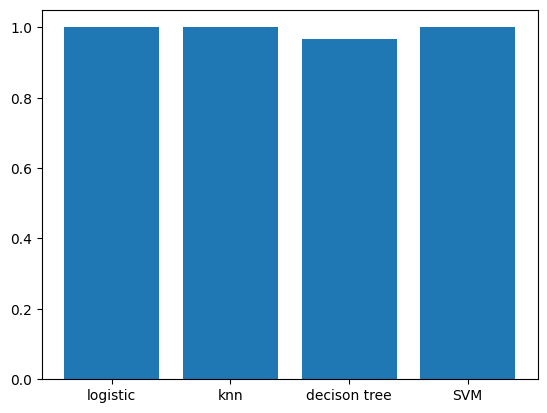

In [64]:
datta=[aa_log,aa_knn,aa_dtc,acc_svm]
label=["logistic","knn","decison tree","SVM"]
plt.bar(label,datta)

<BarContainer object of 4 artists>

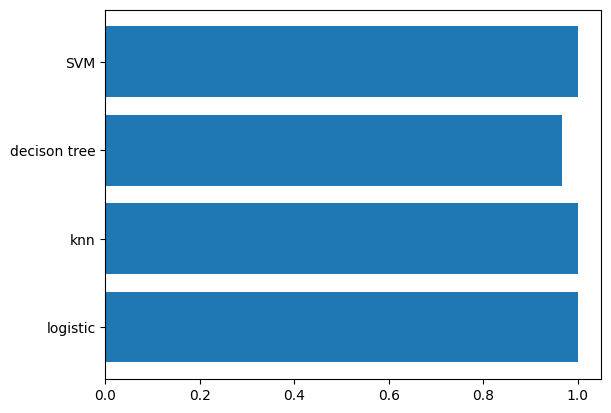

In [65]:
datta=[aa_log,aa_knn,aa_dtc,acc_svm]
label=["logistic","knn","decison tree","SVM"]
plt.barh(label,datta)

In [52]:
cc=confusion_matrix(y_test,pred_log)
cc

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]])